<a href="https://colab.research.google.com/github/DS3001/group9/blob/main/midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/DS3001/group9.git

Cloning into 'group9'...
fatal: could not read Username for 'https://github.com': No such device or address


# Import dependencies and load data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

import zipfile # for reading csv as zip

In [116]:
# zip file in git repo
zip_path = "/gss.csv.zip"

# Desired csv file in zip
file_to_read = "gss.csv"

with zipfile.ZipFile(zip_path, 'r') as zip_file:

  var_list = ['pres80', 'degree', 'age', 'race', 'sex', 'rincom82', 'rincom86'] # List of variables to save
  output_file = 'raw_gss_data.csv' # Name of the file to save the data to

  parser = pd.read_csv(zip_file.open(file_to_read), iterator=True, chunksize=10000, low_memory=False) # Creates a parser for the whole data
  modes = ['w','a'] # Has write mode and append mode
  phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

  for chunk in parser: # For each chunk of the data
      print(chunk.loc[:,var_list].head()) # Visually inspect the first few rows
      chunk.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                                  mode=modes[phase], # control write versus append
                                  header=var_list, # variable names
                                  index=False) # no row index saved
      phase = 1 # Switch from write mode to append mode




   pres80                 degree   age   race     sex  rincom82  rincom86
0     NaN             bachelor's  23.0  white  female       NaN       NaN
1     NaN  less than high school  70.0  white    male       NaN       NaN
2     NaN            high school  48.0  white  female       NaN       NaN
3     NaN             bachelor's  27.0  white  female       NaN       NaN
4     NaN            high school  61.0  white  female       NaN       NaN
      pres80                 degree   age   race     sex rincom82 rincom86
10000    NaN            high school  28.0  black  female      NaN      NaN
10001    NaN            high school  20.0  white  female      NaN      NaN
10002    NaN            high school  57.0  white    male      NaN      NaN
10003    NaN            high school  20.0  white  female      NaN      NaN
10004    NaN  less than high school  19.0  other    male      NaN      NaN
      pres80                 degree   age   race     sex  rincom82  \
20000    NaN  less than high school 

In [117]:
# Create dataframe from 'raw_gss_data.csv' that was just written
gss_dat = pd.read_csv("raw_gss_data.csv")


# Data cleaning and preprocessing

In [118]:
gss_dat['pres80'].unique()

array([nan, 'pres80', 'reagan', 'carter', 'anderson', 'refused_(5)',
       'other', 'didnt vote'], dtype=object)

In [119]:
#print(gss_dat['pres80'].value_counts())

# Remove "didn't vote for president" and other no answer responses (see codebook)
gss_dat = gss_dat.loc[
    (gss_dat['pres80'] == 'reagan') |
    (gss_dat['pres80'] == 'carter') |
    (gss_dat['pres80'] == 'anderson'), :]

# Every entry either voted for Trump, Clinton, or other unspecified candidate
print(gss_dat['pres80'].value_counts())
print(gss_dat['pres80'].isnull().sum())


# data is now filtered for years 82-87, as observations for pres80 are only in this range

carter      2635
reagan      2218
anderson     308
Name: pres80, dtype: int64
0


<Axes: >

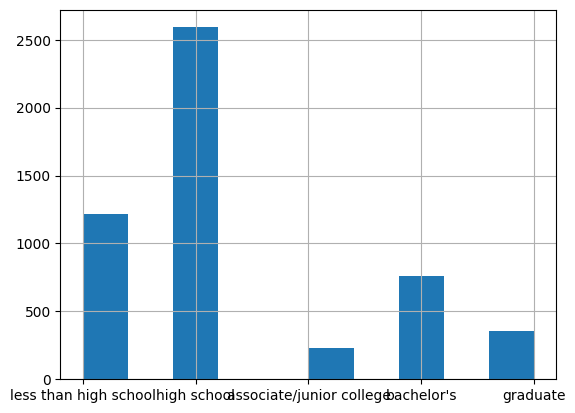

In [120]:
# Used to restore original 'degree' bc I keep messing it up
gss_dat['degree'].isnull().sum()
gss_dat['degree'].value_counts()
gss_dat['degree'].unique() # NaN and 'degree' present

gss_dat = gss_dat.loc[(~gss_dat['degree'].isnull()) & (gss_dat['degree'] != 'degree'), ] # keep rows where value for degree is not NaN or 'degree' (see codebook, NaN and 'degree' respones are invalid)
gss_dat['degree'].unique() # all observations are now "bachelor's", 'less than high school', 'high school', 'graduate', or 'associate/junior college'

gss_dat['degree'].hist()

In [121]:
# rincom82
# because of the distribution of this histogram, I think it is ok to take the mean of each range as its numeric value
## $50,000 + is ok as 50000 as it is not a huge proportion of the data
#gss_dat['rincom82'].hist()
gss_dat['rincom82'].unique()

gss_dat['rincom82'].value_counts()
# recode all values to numeric mean of range
temp = gss_dat['rincom82'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-34999', 30000).replace('$35000-49999', 42500).replace('$50000 +', 50000)
temp.value_counts()
gss_dat['rincom82'] = temp



# rincom86
gss_dat['rincom86'].value_counts()
# recode all values to numeric mean of range
temp = gss_dat['rincom86'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-29999', 27500).replace('$30000-34999', 32500).replace('$35000-39999', 37500).replace('$40000-49999', 45000).replace('$50000-59999', 55000).replace('$60000+', 60000)
temp.value_counts()
gss_dat['rincom86'] = temp

gss_dat = gss_dat.loc[(~gss_dat['rincom82'].isnull()) |
                      (~gss_dat['rincom86'].isnull()), ] # dropped all rows where rincom82 is a NaN or rincom86 is a NaN


print(gss_dat['rincom82'].unique())
print(gss_dat['rincom86'].unique())

gss_dat['income'] = gss_dat['rincom82'].fillna(gss_dat['rincom86']) # make a combined column 'income' that is equal to rincom82 unless it is NaN, then equal to rincom86
gss_dat['income'].describe()



[18750. 16250. 11250.  2000. 30000.  1000.  6500.  4500.  3500. 13750.
 21250. 23750.  7500.  5500. 50000.  9000. 42500.    nan]
[   nan 60000. 45000. 11250. 27500. 21250. 23750. 32500.  7500.  5500.
  3500.  1000. 55000.  4500. 37500. 13750. 16250.  2000.  9000. 18750.
  6500.]


<ipython-input-121-181c6faa1a86>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat['income'] = gss_dat['rincom82'].fillna(gss_dat['rincom86']) # make a combined column 'income' that is equal to rincom82 unless it is NaN, then equal to rincom86


count     3275.000000
mean     18649.160305
std      13456.749710
min       1000.000000
25%       9000.000000
50%      16250.000000
75%      27500.000000
max      60000.000000
Name: income, dtype: float64

In [136]:
print(gss_dat['age'].value_counts())
gss_dat['age'].isnull().sum()
gss_dat = gss_dat.loc[~gss_dat['age'].isnull(), ] # keep rows where age is NOT null
gss_dat['age'].isnull().sum()

gss_dat['age'] = pd.to_numeric(gss_dat['age'], errors="coerce")

37.0    106
35.0    105
34.0    104
30.0    103
32.0    100
       ... 
79.0      2
83.0      2
81.0      2
80.0      2
84.0      1
Name: age, Length: 65, dtype: int64


In [125]:
gss_dat['degree'] = gss_dat['degree'].replace('less than high school', 0).replace('high school', 1).replace('associate/junior college', 2).replace("bachelor's", 3).replace('graduate', 4)
# 0 = Less than hs
# 1 = hs
# 2 = associate/junior college
# 3 = bachelors
# 4 = graduate


In [110]:
# Function to max-min normalize data so each variables ranges from 0-1
def maxmin(x):
  res = (x-min(x))/(max(x)-min(x))
  return res

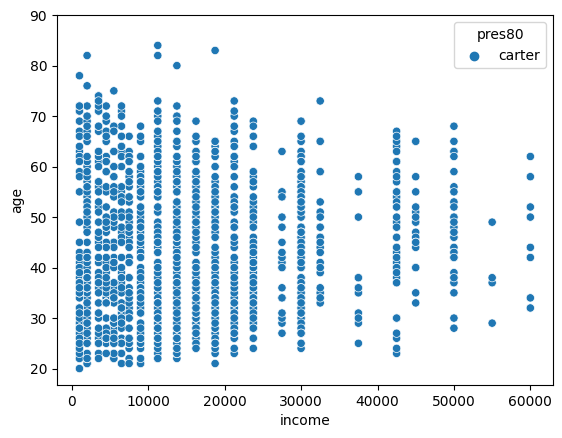

In [140]:
X = gss_dat[['income', 'degree']]
y = gss_dat['pres80']

# Carter scatter
plot = sns.scatterplot(gss_dat.loc[gss_dat['pres80'] == 'carter'], x='income', y='age', hue='pres80')
plot.set_yticks([20, 30, 40, 50, 60, 70, 80, 90])


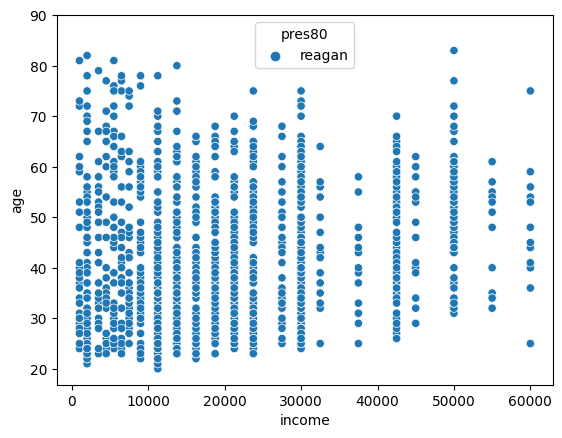

In [141]:
# Reagan scatter
plot = sns.scatterplot(gss_dat.loc[gss_dat['pres80'] == 'reagan'], x='income', y='age', hue='pres80')
plot.set_yticks([20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
### to-do ideas ###
#   - K means clustering on each separate group, compare clusters
#   - look further based on sex and/or race breakdown
#

In [147]:
pd.crosstab(gss_dat['race'], gss_dat['pres80'])

pres80,anderson,carter,reagan
race,,,
black,12,504,20
other,1,36,18
white,229,1091,1362


In [148]:
# numbers are close, no distinct splits
pd.crosstab(gss_dat['sex'], gss_dat['pres80'])

pres80,anderson,carter,reagan
sex,,,
female,126,881,619
male,116,750,781


In [ ]:
### ignore below ###

In [9]:
gss_dat['abmoral'].value_counts() # clean, can remove "depends" for more specific results
gss_dat['abmoral'].isnull().sum() # so many absent values, no reason to continue with variable
gss_dat.drop('abmoral', axis=1, inplace=True) # drop column 'abmoral' on axis 1 (column)

In [12]:
gss_dat['madeg'].isnull().sum()
gss_dat['madeg'].unique() # NaNs present

gss_dat = gss_dat.loc[~gss_dat['madeg'].isnull(), ] # keep rows where value for madeg is not NaN
gss_dat['madeg'].unique() # NaNs present

array(['high school', 'less than high school', "bachelor's", 'graduate',
       'associate/junior college'], dtype=object)

In [13]:
gss_dat['padeg'].isnull().sum()
gss_dat['padeg'].unique() # NaNs present

gss_dat = gss_dat.loc[~gss_dat['padeg'].isnull(), ] # keep rows where value for padeg is not NaN
gss_dat['padeg'].unique() # NaNs present

array(['high school', 'less than high school', 'associate/junior college',
       "bachelor's", 'graduate'], dtype=object)

In [14]:
gss_dat['sex'].unique() # NaN present
gss_dat = gss_dat.loc[~gss_dat['sex'].isnull(), ] # check codebook, sex == nan does not make sense in context of survey
gss_dat['sex'].unique()

array(['male', 'female'], dtype=object)

Proportion white: 0.8429476492164054
Proportion black: 0.09736578859619874
Proportion other than w/b: 0.0596865621873958


<Axes: >

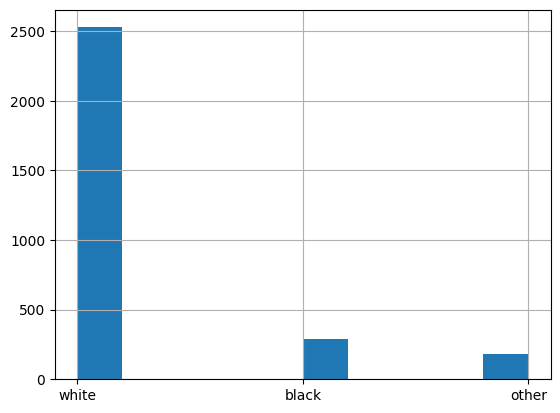

In [15]:
gss_dat['race'].value_counts().sum()
gss_dat = gss_dat.loc[~gss_dat['race'].isnull(), ] # keep rows where race is not null

gss_dat['race'].unique()
print("Proportion white:", (gss_dat['race'] == 'white').sum() / (len(gss_dat))) # output of proportions of race in data for reference/Data write up
print("Proportion black:", (gss_dat['race'] == 'black').sum() / (len(gss_dat)))
print("Proportion other than w/b:", (gss_dat['race'] == 'other').sum() / (len(gss_dat)))

gss_dat['race'].hist()

In [16]:
gss_dat = gss_dat.loc[(~gss_dat['wrkstat'].isnull()), ] # remove NaNs
gss_dat['wrkstat'] = gss_dat['wrkstat'].replace('unemployed, laid off, looking for work', 'unemployed') # replace long string of unemployed states with 'unemployed'
(gss_dat['wrkstat'] == 'with a job, but not at work because of temporary illness, vacation, strike').sum() # relatively few entries, annoying value

gss_dat = gss_dat.loc[gss_dat['wrkstat'] != 'with a job, but not at work because of temporary illness, vacation, strike', ] # delete rows w/ this entry ^
print(gss_dat['wrkstat'].value_counts())

working full time    1389
retired               868
working part time     274
keeping house         180
unemployed            112
other                  58
in school              44
Name: wrkstat, dtype: int64


<ipython-input-16-c810d216cb43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat['wrkstat'] = gss_dat['wrkstat'].replace('unemployed, laid off, looking for work', 'unemployed') # replace long string of unemployed states with 'unemployed'


In [17]:
gss_dat = gss_dat.loc[~gss_dat['wrkstat'].isnull(), ]
gss_dat['wrkgovt'].unique()

array(['private', 'government', nan], dtype=object)

In [18]:
# Shows that many mothers and fathers have similiar levels of education
pd.crosstab(gss_dat['madeg'], gss_dat['padeg'])

padeg,associate/junior college,bachelor's,graduate,high school,less than high school
madeg,,,,,
associate/junior college,23,29,16,77,17
bachelor's,11,159,129,113,16
graduate,6,46,91,41,7
high school,49,193,101,971,281
less than high school,8,13,6,139,383
